In [24]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xarray as xr

% matplotlib inline

### UN Population Data Analysis

**<span style="color:red; background:yellow;">Problem: Missing countries after Ecuador (alphabetical)</span>**

**Data & Scope:** downloaded on 11/30 5.28 pm
- 1950-2100
- for areas/countries with:
    - '>' 90,000 inhabitants in 2017, key demographic indicators provided
    - < 90,000 inhabitatns, ONLY figures related to pop size and growth provided
    
- Population data only. Data includes historical/current estimates to probabilistic future projections  
- last update - 20 Aug 2013
- next udpate - summer 2019

**Source:** United Nations (http://data.un.org/Data.aspx?d=PopDiv&f=variableID%3a12)

**Analysis Goals**
- Compare UN population data with PWT, WB, and IMF data
- Based on methodology. evaluate whether UN dataset seems reliable for historical population data

*Currently Out of Scope*
- Also evaluate whether UN dataset seems reliable for future projection X 

**Conclusion**
1. Different years may have unequal country #s.
- Year 2012 has 658 countries. (1 more country than - 2011)
- Year 2013-2100 has 666 countries. (3 more countires than 2012)
- Year 1950-2011 has 657 countries. 

2. Data provided from 1950-2100. Therefore, 1950-2017 data is present. But data points after 2015 are projections. 


**Questions**


,countrycode,country,currency_unit,year,rgdpe,rgdpo,pop,emp,avh,hc,...,csh_g,csh_x,csh_m,csh_r,pl_c,pl_i,pl_g,pl_x,pl_m,pl_k
0,ABW,Aruba,Aruban Guilder,1950,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ABW,Aruba,Aruban Guilder,1951,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ABW,Aruba,Aruban Guilder,1952,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ABW,Aruba,Aruban Guilder,1953,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ABW,Aruba,Aruban Guilder,1954,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,ABW,Aruba,Aruban Guilder,1955,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ABW,Aruba,Aruban Guilder,1956,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,ABW,Aruba,Aruban Guilder,1957,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,ABW,Aruba,Aruban Guilder,1958,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,ABW,Aruba,Aruban Guilder,1959,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


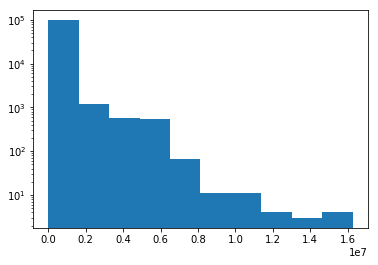

In [37]:
# open data
df = pd.read_csv('~/Dropbox/covariate_project/zerg/data/UN/UNdata_Export_20171201_022351573.csv')

df_wb = pd.read_csv('/Users/mlimb/Dropbox/covariate_project/zerg/data/WB/population/API_SP.POP.TOTL_DS2_en_csv_v2.csv', skiprows=3)
df_pwt = pd.read_stata('/Users/mlimb/Dropbox/covariate_project/zerg/data/PWT/pwt90.dta')
# colnames are'Country or Area Code', 'Country or Area', 'Year(s)', 'Variant', 'Value']
plt.hist(df['Value'], log=True)
df_pwt.head(15)

In [30]:
df.columns

Index(['Country or Area Code', 'Country or Area', 'Year(s)', 'Variant',
       'Value'],
      dtype='object')

In [61]:
df['Year(s)'].unique()


array([2100, 2099, 2098, 2097, 2096, 2095, 2094, 2093, 2092, 2091, 2090,
       2089, 2088, 2087, 2086, 2085, 2084, 2083, 2082, 2081, 2080, 2079,
       2078, 2077, 2076, 2075, 2074, 2073, 2072, 2071, 2070, 2069, 2068,
       2067, 2066, 2065, 2064, 2063, 2062, 2061, 2060, 2059, 2058, 2057,
       2056, 2055, 2054, 2053, 2052, 2051, 2050, 2049, 2048, 2047, 2046,
       2045, 2044, 2043, 2042, 2041, 2040, 2039, 2038, 2037, 2036, 2035,
       2034, 2033, 2032, 2031, 2030, 2029, 2028, 2027, 2026, 2025, 2024,
       2023, 2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013,
       2012, 2011, 2010, 2009, 2008, 2007, 2006, 2005, 2004, 2003, 2002,
       2001, 2000, 1999, 1998, 1997, 1996, 1995, 1994, 1993, 1992, 1991,
       1990, 1989, 1988, 1987, 1986, 1985, 1984, 1983, 1982, 1981, 1980,
       1979, 1978, 1977, 1976, 1975, 1974, 1973, 1972, 1971, 1970, 1969,
       1968, 1967, 1966, 1965, 1964, 1963, 1962, 1961, 1960, 1959, 1958,
       1957, 1956, 1955, 1954, 1953, 1952, 1951, 19

In [75]:
df.shape

(100000, 5)

In [77]:
print(df['Country or Area'].nunique()) # 74 unique country/areas
print(df['Year(s)'].nunique()) # 151 years
df['Variant'].nunique() # 9 variants 
df['Variant']
df['Year(s)'].unique()
df.keys()
df.columns

# Filter medium variant only
df_med = df[df['Variant']=='Medium']
df_med.shape
df_med.head(7)


74
151


,Country or Area Code,Country or Area,Year(s),Variant,Value
0,4,Afghanistan,2100,Medium,70409.629
9,4,Afghanistan,2099,Medium,70604.652
18,4,Afghanistan,2098,Medium,70793.669
27,4,Afghanistan,2097,Medium,70975.797
36,4,Afghanistan,2096,Medium,71150.213
45,4,Afghanistan,2095,Medium,71316.116
54,4,Afghanistan,2094,Medium,71472.775


In [80]:

 #Filter historical estimates only

df_hist = df_med[df_med['Year(s)']<=2015]
#df_hist['Year(s)'].unique()

In [81]:
df_hist.columns


Index(['Country or Area Code', 'Country or Area', 'Year(s)', 'Variant',
       'Value'],
      dtype='object')

In [98]:
g = df_hist.groupby(["Country or Area"], as_index=False )
china = g.get_group('China')

df_hist[['Country or Area','Year(s)','Value']]
pivoted=df_hist.pivot(index='Country or Area', columns='Year(s)', values='Value')
pivoted.columns
pivoted.loc['Africa']
resetted = pivoted.reset_index(inplace=False)
resetted

Year(s),Country or Area,1950,1951,1952,1953,1954,1955,1956,1957,1958,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Afghanistan,7752.118,7839.510,7934.980,8038.596,8150.447,8270.581,8399.030,8535.807,8680.946,...,25893.450,26616.792,27294.031,28004.331,28803.167,29708.599,30696.958,31731.688,32758.020,33736.494
1,Africa,228670.019,233277.049,238113.121,243177.791,248471.497,253995.025,259750.195,265739.281,271965.261,...,948156.166,972265.961,997144.670,1022858.654,1049446.344,1076933.813,1105285.268,1134398.192,1164129.789,1194369.908
2,Albania,1263.174,1287.497,1316.089,1348.099,1382.878,1419.970,1459.089,1500.149,1543.222,...,3054.331,3023.907,2991.651,2962.635,2940.525,2926.659,2920.039,2918.978,2920.775,2923.352
3,Algeria,8872.247,9039.910,9216.397,9405.443,9609.505,9829.719,10065.822,10316.288,10578.449,...,33777.915,34300.076,34860.715,35465.760,36117.637,36819.558,37565.847,38338.562,39113.313,39871.528
4,American Samoa,18.940,19.296,19.540,19.677,19.729,19.702,19.652,19.598,19.602,...,58.650,57.903,57.030,56.227,55.637,55.320,55.230,55.307,55.437,55.537
5,Andorra,6.196,6.689,7.247,7.865,8.525,9.232,9.989,10.779,11.615,...,80.991,82.683,83.861,84.462,84.449,83.751,82.431,80.788,79.223,78.014
6,Angola,4548.023,4659.333,4774.561,4890.469,5004.763,5116.071,5224.003,5329.099,5432.717,...,20262.399,20997.687,21759.420,22549.547,23369.131,24218.565,25096.150,25998.340,26920.466,27859.305
7,Anguilla,5.118,5.296,5.446,5.552,5.640,5.700,5.736,5.779,5.807,...,12.903,13.150,13.360,13.565,13.769,13.951,14.129,14.299,14.459,14.611
8,Antigua and Barbuda,46.303,48.365,49.999,51.262,52.208,52.897,53.420,53.838,54.241,...,90.301,91.381,92.478,93.581,94.661,95.719,96.777,97.824,98.875,99.923
9,Argentina,17150.336,17507.130,17866.096,18224.150,18579.037,18929.346,19274.528,19614.847,19951.323,...,39558.890,39970.224,40382.389,40799.407,41223.889,41656.879,42096.739,42539.925,42981.515,43417.765


# Warning: there is =something with the data source-- it only goes up from Afghanista to Ecuador likely not all data was downloaded

In [ ]:
# Get unique country Names
df['Country or Area'].unique().size

In [ ]:
df.columns
#df['Variant'].unique()

#print(df['Year(s)'].value_counts().unique())
# Each year appears _ number of times (one of the three)
# count. 666, 658, 657
# freq.  88,  1,   62
year_counts = df['Year(s)'].value_counts() # Series
#Q: why do some years appear more than others?
# Does this reflect any changes in countries represented/data collected over time?
# Which ones?

year_with_freq_666 = year_counts[year_counts == 666]
year_with_freq_658 = year_counts[year_counts == 658]
year_with_freq_657 = year_counts[year_counts == 657]

#print(df['Year(s)'].value_counts().value_counts())
# Frequency of occurrence: 88 62 1
year_with_freq_658 # 2012
dd = year_with_freq_666.sort_index() # years 2013  
dd_hist = year_with_freq_657.sort_index() 

#get index values (which are years)
dd.index[0] # get first index -> 2013
dd.index[-1] # get last index -> 2100

#get index values (which are years)
dd_hist.index[0] # get first index -> 1950
dd_hist.index[-1] # get last index -> 2011

## Q. Which countries are unaccounted for in years with 658/657 countries?

#Q. which countries are missing in 658 freq. vs 666 freq? (Should be 8 countries)

### Get differences between all index (in this case years with 666 freq in dataset)


In [ ]:
#dd.diff() # Get differences between values -> Series

# Get differences between all index (in this case years with 666 freq in dataset)
xdiff = np.diff(dd.index.values) # returns array of 1's
xdiff_hist = np.diff(dd_hist.index.values)

# Get subset of xdiff, which doesn't have difference of 1
xdiff[xdiff != 1] == [] # returns empty array

# Different groups are 666, 657, 658 (based on frequency of occurrence)
print ("Are the years in 3 groups contiguous?")
print (xdiff[xdiff != 1].size == 0)
print (xdiff_hist[xdiff_hist != 1].size == 0)